In [70]:
import pandas as pd

data = pd.read_csv('time_eval.csv')
data.head()

,id,time_gpt,time_hybrid
0,1,6.86,5.46
1,2,5.81,5.45
2,3,4.47,25.17
3,4,4.54,5.69
4,5,4.69,40.18


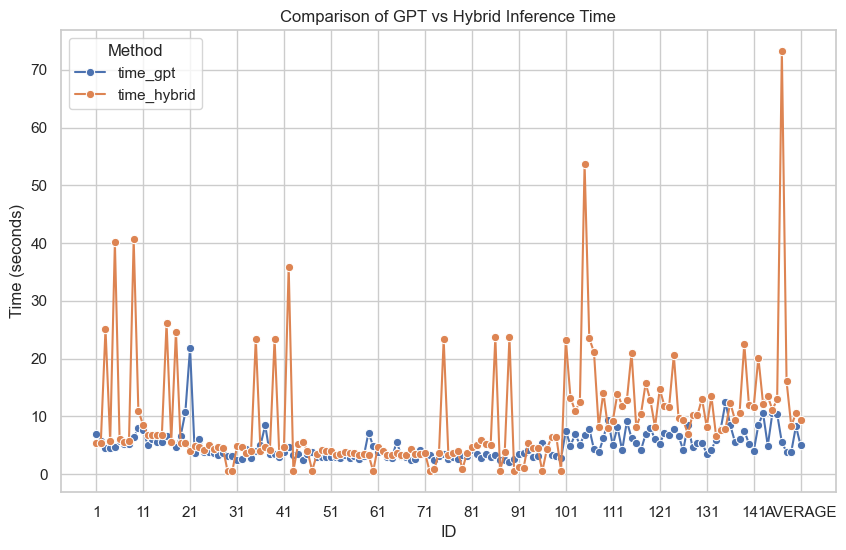

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is defined as combined_df
combined_df = pd.DataFrame(data)

df_melted = combined_df.melt(id_vars=['Test #'], var_name='Method', value_name='Time')

# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Test #', y='Time', hue='Method', marker='o')

plt.title('Comparison of GPT vs Hybrid Inference Time')
plt.xlabel('ID')
plt.ylabel('Time (seconds)')


n = 10  
plt.xticks(combined_df['Test #'][::n-1])

plt.legend(title='Method')
plt.show()


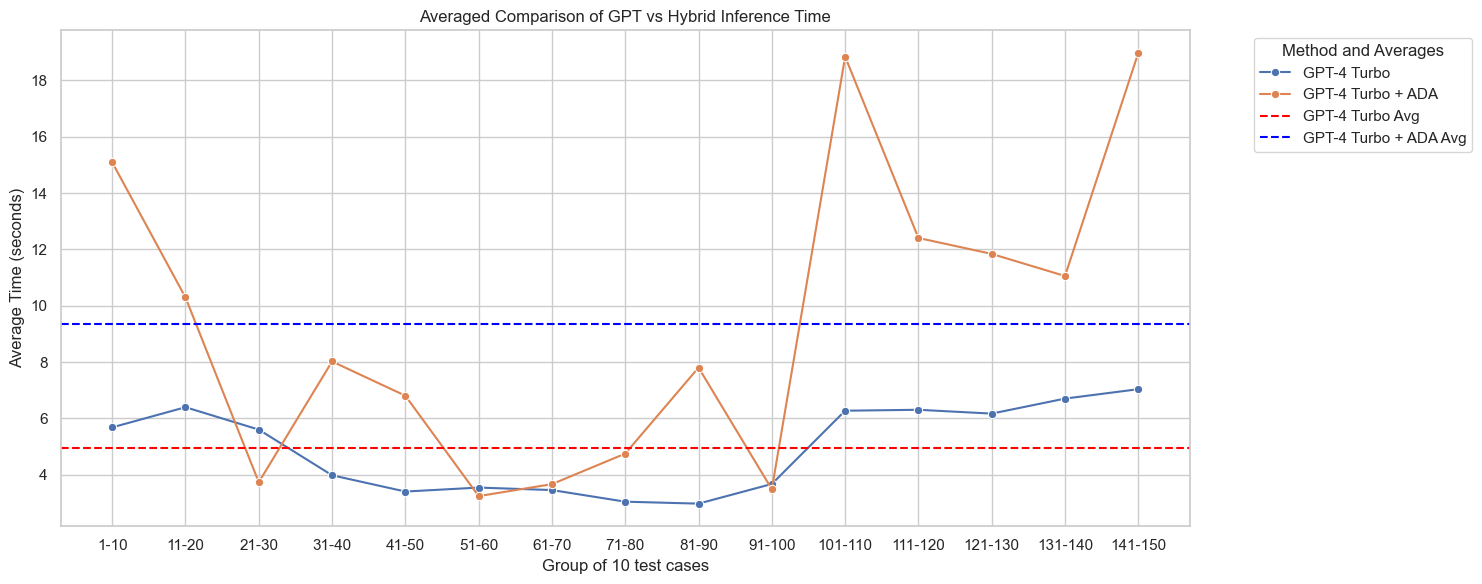

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is defined as combined_df
combined_df = pd.DataFrame(data)

# Melting the DataFrame for easier plotting
df_melted = combined_df.melt(id_vars=['id'], var_name='Method', value_name='Time')

# Convert 'id' to numeric to ensure proper grouping
df_melted['id'] = pd.to_numeric(df_melted['id'], errors='coerce')
df_melted.dropna(subset=['id'], inplace=True)  # Drop rows with NaN in 'id'

# Calculate the group for averaging every 10 IDs
df_melted['Group'] = df_melted['id'].apply(lambda x: np.floor((x-1)/10))

# Calculate the mean for these groups
averaged_df = df_melted.groupby(['Group', 'Method'])['Time'].mean().reset_index()

# Plotting the averaged data
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))
lineplot = sns.lineplot(data=averaged_df, x='Group', y='Time', hue='Method', marker='o')

# Define colors for the average lines
avg_line_colors = {'GPT-4 Turbo': 'red', 'GPT-4 Turbo + ADA': 'blue'}

for method in df_melted['Method'].unique():
    # Calculate the overall average time for the current method
    avg_time = df_melted[df_melted['Method'] == method]['Time'].mean()
    # Plot a horizontal line for the overall average time with specified color
    plt.axhline(avg_time, linestyle='--', color=avg_line_colors[method], label=f'{method} Avg')

plt.title('Averaged Comparison of GPT vs Hybrid Inference Time')
plt.xlabel('Group of 10 test cases')
plt.ylabel('Average Time (seconds)')

# Adjust the x-ticks to represent the ID ranges
group_labels = [f'{int(g*10+1)}-{int((g+1)*10)}' for g in averaged_df['Group'].unique()]
plt.xticks(ticks=np.arange(len(group_labels)), labels=group_labels, rotation=0)

# Move the legend outside the plot
plt.legend(title='Method and Averages', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


/var/folders/9p/y3gxgvlj5p79ygf8zttgtssw0000gn/T/ipykernel_57059/540066243.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Time', y='Method', data=df_melted, palette="vlag", flierprops=outlier_props)


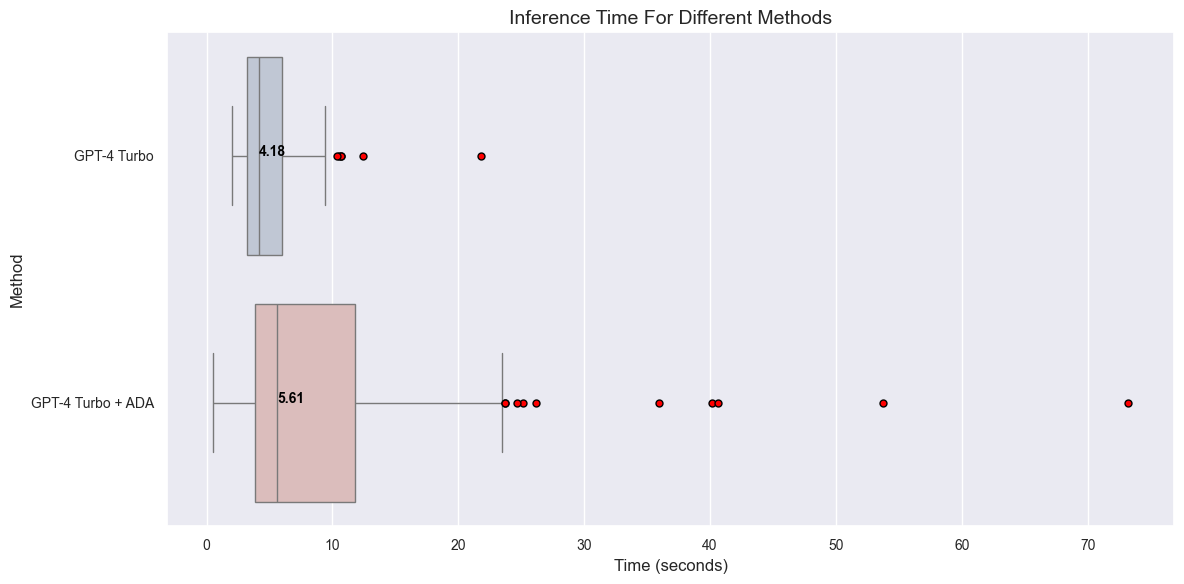

In [56]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame after renaming columns
data = pd.read_csv('time_eval.csv')
data.rename(columns={'time_gpt': 'GPT-4 Turbo', 'time_hybrid': 'GPT-4 Turbo + ADA'}, inplace=True)

df_melted = pd.melt(data, id_vars=['id'], value_vars=['GPT-4 Turbo', 'GPT-4 Turbo + ADA'], var_name='Method', value_name='Time')

# Setting the overall aesthetics with seaborn
sns.set_theme(style="darkgrid")

outlier_props = {
    "marker": "o",  # Use circle markers for outliers
    "markersize": 5,  # Size of the markers
    "markerfacecolor": "red",  # Fill color of the markers (darken the outliers)
    "markeredgecolor": "black",  # Edge color of the markers
}

# Creating the boxplot with seaborn
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Time', y='Method', data=df_melted, palette="vlag", flierprops=outlier_props)

# Adding more descriptive elements
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Method', fontsize=12)
plt.title('Inference Time For Different Methods', fontsize=14)

# Optional: Customizing ticks for clarity
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotating the median values
medians = df_melted.groupby(['Method'])['Time'].median()
for tick, label in enumerate(ax.get_yticklabels()):
    method_name = label.get_text()
    median_val = medians[method_name]
    # Adjust position based on your specific plot configuration
    ax.text(median_val, tick, f'{median_val:.2f}', 
            horizontalalignment='left', size='small', color='black', weight='semibold')

plt.tight_layout()  # Adjust subplot parameters to give some padding.
plt.show()
